### Import Libraries

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder



### 1. Open Typeform Data from Survey

In [70]:
df = pd.read_csv("../data/typeform_igb.csv")

df.head()

,#,¿En qué rango de edad te encuentras?,¿Cuántas personas sois en vuestro hogar?,¿En qué provincia vives? Vamos a conocernos un poco mejor 😄,¿De cuál de estos temas te interesaría saber más?,¿Cuánto duran tus duchas?,¿Cuántas veces pones la lavadora a la semana?,¿Cuántas veces pones el lavavajillas?,¿Sueles poner el modo *ECO *en tus electrodomésticos?,¿Reciclas agua para usarlo en otras tareas?,...,"cartón y plástico?""""",¿Cada cuánto consumes *carne*?,¿Cuántos km haces a la semana en coche?,¿Cuánto gastas al mes en comida para gato/perro?,¿Cuántos metros cuadrados tiene tu jardín?,¿Sabes cuánto dinero gastas en tu consumo de agua al mes?,Start Date (UTC),Submit Date (UTC),Network ID,Tags;
0,cb2hsyhk4q48anbuacl1cb2hspesvqca,Entre 36 y 65 años,4.0,Madrid,Ayudar al ecosistema,Entre 5 y 10 minutos,Entre 3 y 5 veces,Entre 3 y 5 a la semana,A veces,No,...,1 vez al día,Más de 200 km,No tengo mascota,0,Ni idea!,2023-05-18 05:55:47,2023-05-18 05:58:06,31494a64d0,;,NaN
1,1lvp0ymwpl878xcfgo1lvp0yhw1vy0ld,Entre 36 y 65 años,3.0,Segovia,Ayudar al ecosistema,Menos de 5 minutos,Menos de 3 veces,Entre 3 y 5 a la semana,Siempre,No,...,1 vez cada 3 días,Menos de 100 km,No tengo mascota,300,Ni idea!,2023-05-18 05:36:34,2023-05-18 05:38:17,26873d694b,;,NaN
2,t5e8kn9ug41t5zdgpgnt5e8kn9dx7xba,Entre 36 y 65 años,2.0,Segovia,Ahorrar dinero,Menos de 5 minutos,Menos de 3 veces,Friego a mano,No sabía que existía ese modo,No,...,1 vez a la semana,100 - 200 km,No tengo mascota,0,Ni idea!,2023-05-18 05:31:31,2023-05-18 05:33:35,6050316def,;,NaN
3,lhrk180jtc1swhx2plhrk18wntdhnix6,Entre 18 y 35 años,2.0,Segovia,Ahorrar agua,Entre 5 y 10 minutos,Menos de 3 veces,Friego a mano,Siempre,No,...,1 vez al día,Menos de 100 km,No tengo mascota,0,Ni idea!,2023-05-18 05:22:13,2023-05-18 05:23:42,903866689d,;,NaN
4,6mv5t8yarw67kj343annxsb6mv5t8yhx,Entre 36 y 65 años,2.0,Madrid,Ahorrar agua,Entre 5 y 10 minutos,Menos de 3 veces,Friego a mano,A veces,Si,...,1 vez cada 3 días,No uso coche,No tengo mascota,2,Entre 10€ y 40 €,2023-05-18 05:05:50,2023-05-18 05:08:08,1acecc257c,;,NaN


### Lets remove some unnecesary columns that disturb us

In [71]:
# Drop the first column and last two columns
df = df.drop(df.columns[0], axis=1)  
df = df.iloc[:, :-5] 

df.head()

,¿En qué rango de edad te encuentras?,¿Cuántas personas sois en vuestro hogar?,¿En qué provincia vives? Vamos a conocernos un poco mejor 😄,¿De cuál de estos temas te interesaría saber más?,¿Cuánto duran tus duchas?,¿Cuántas veces pones la lavadora a la semana?,¿Cuántas veces pones el lavavajillas?,¿Sueles poner el modo *ECO *en tus electrodomésticos?,¿Reciclas agua para usarlo en otras tareas?,¿*Reciclas *vidrio,"cartón y plástico?""""",¿Cada cuánto consumes *carne*?,¿Cuántos km haces a la semana en coche?,¿Cuánto gastas al mes en comida para gato/perro?,¿Cuántos metros cuadrados tiene tu jardín?
0,Entre 36 y 65 años,4.0,Madrid,Ayudar al ecosistema,Entre 5 y 10 minutos,Entre 3 y 5 veces,Entre 3 y 5 a la semana,A veces,No,Siempre,1 vez al día,Más de 200 km,No tengo mascota,0,Ni idea!
1,Entre 36 y 65 años,3.0,Segovia,Ayudar al ecosistema,Menos de 5 minutos,Menos de 3 veces,Entre 3 y 5 a la semana,Siempre,No,A veces,1 vez cada 3 días,Menos de 100 km,No tengo mascota,300,Ni idea!
2,Entre 36 y 65 años,2.0,Segovia,Ahorrar dinero,Menos de 5 minutos,Menos de 3 veces,Friego a mano,No sabía que existía ese modo,No,A veces,1 vez a la semana,100 - 200 km,No tengo mascota,0,Ni idea!
3,Entre 18 y 35 años,2.0,Segovia,Ahorrar agua,Entre 5 y 10 minutos,Menos de 3 veces,Friego a mano,Siempre,No,A veces,1 vez al día,Menos de 100 km,No tengo mascota,0,Ni idea!
4,Entre 36 y 65 años,2.0,Madrid,Ahorrar agua,Entre 5 y 10 minutos,Menos de 3 veces,Friego a mano,A veces,Si,Siempre,1 vez cada 3 días,No uso coche,No tengo mascota,2,Entre 10€ y 40 €


## 2. Exploratory Data Analysis

### Feature and Target Analysis

The dataset contains a list of Spanish residents behaviour of their personal water consumption.

**Features:**

1. Age: 4 groups of age
2. Residents: Number of people who live in a home.
3. Province: What part of Spain are you from.
4. Interests: 
5. Shower
6. Washing machine
7. Dishwasher
8. Eco Mode
9. Water recycling
10. General recycling
11. Meat Consumption
12. Gasoline
13. Pet
14. Garden area
15. Water estimation spent

**Targets:**

We do not now yet. 

* Expected groups:
    * 0: Water Saver 
    * 1: Water Spender
    * 2: Water unconscious

### Rename columns

In [72]:
list = [ "Age",
 "Residents",
 "Province",
 "Interests",
 "Shower",
 "WashingMachine",
 "DishWasher",
 "EcoMode",
 "WaterRecycling",
 "GeneralRecycling",
 "Meat",
 "Gasoline",
 "Pet",
"Garden",
 "Estimation"]

for index,name in enumerate(list):
    df.rename(columns={df.columns[index]: name}, inplace=True)

df.head()

,Age,Residents,Province,Interests,Shower,WashingMachine,DishWasher,EcoMode,WaterRecycling,GeneralRecycling,Meat,Gasoline,Pet,Garden,Estimation
0,Entre 36 y 65 años,4.0,Madrid,Ayudar al ecosistema,Entre 5 y 10 minutos,Entre 3 y 5 veces,Entre 3 y 5 a la semana,A veces,No,Siempre,1 vez al día,Más de 200 km,No tengo mascota,0,Ni idea!
1,Entre 36 y 65 años,3.0,Segovia,Ayudar al ecosistema,Menos de 5 minutos,Menos de 3 veces,Entre 3 y 5 a la semana,Siempre,No,A veces,1 vez cada 3 días,Menos de 100 km,No tengo mascota,300,Ni idea!
2,Entre 36 y 65 años,2.0,Segovia,Ahorrar dinero,Menos de 5 minutos,Menos de 3 veces,Friego a mano,No sabía que existía ese modo,No,A veces,1 vez a la semana,100 - 200 km,No tengo mascota,0,Ni idea!
3,Entre 18 y 35 años,2.0,Segovia,Ahorrar agua,Entre 5 y 10 minutos,Menos de 3 veces,Friego a mano,Siempre,No,A veces,1 vez al día,Menos de 100 km,No tengo mascota,0,Ni idea!
4,Entre 36 y 65 años,2.0,Madrid,Ahorrar agua,Entre 5 y 10 minutos,Menos de 3 veces,Friego a mano,A veces,Si,Siempre,1 vez cada 3 días,No uso coche,No tengo mascota,2,Entre 10€ y 40 €


### Paint some Data 👨🏻‍🎨

In [73]:
# PAIR PLOT

colors = [ '#ee6c4d', '#98c1d9', '#3d5a80', '#293241']
sns.set_palette(sns.color_palette(colors))

Entre 36 y 65 años    652
Entre 18 y 35 años    425
Mayor de 65 años       82
Menor de 18 años       19
NaN                     5
Name: Age, dtype: int64


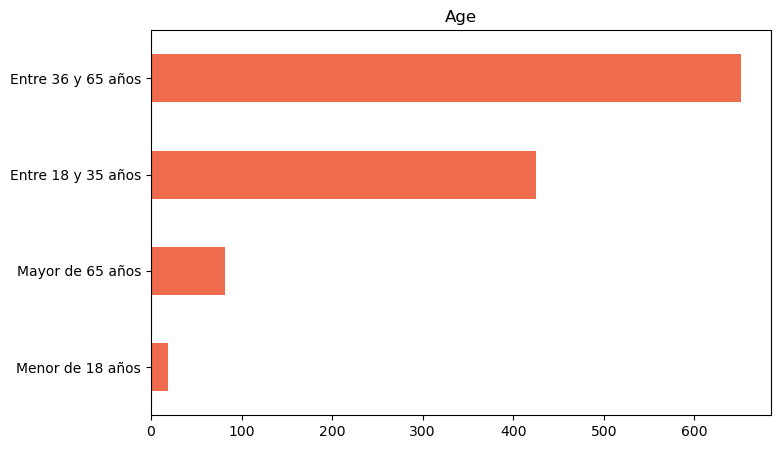

2.0     354
4.0     293
3.0     287
1.0     118
5.0      99
6.0      16
7.0       6
NaN       5
8.0       3
10.0      2
Name: Residents, dtype: int64


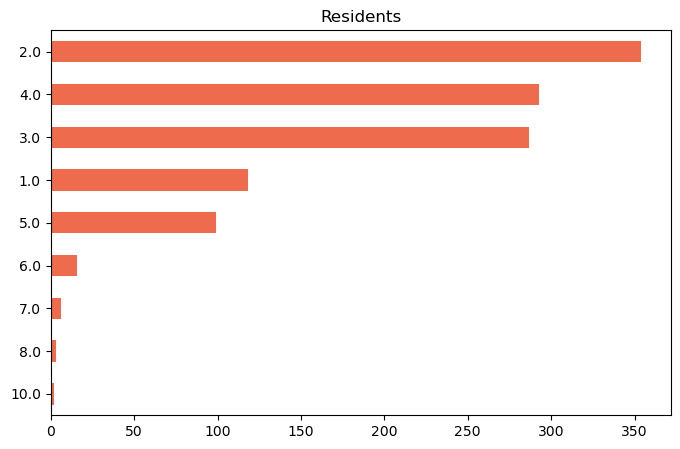

Madrid                    638
Segovia                   201
Asturias                   49
Barcelona                  36
Sevilla                    27
Toledo                     22
Cantabria                  15
Valladolid                 15
Cádiz                      14
A Coruña                   10
Zaragoza                   10
Málaga                      9
Murcia                      7
Valencia                    7
Pontevedra                  7
Huesca                      7
Vizcaya                     6
Alicante                    6
Burgos                      5
Jaén                        5
Lugo                        5
Gipuzkoa                    5
Las Palmas                  5
Salamanca                   4
León                        4
Girona                      4
Ávila                       4
Huelva                      4
La Rioja                    3
Badajoz                     3
Albacete                    3
NaN                         3
Tarragona                   3
Álava     

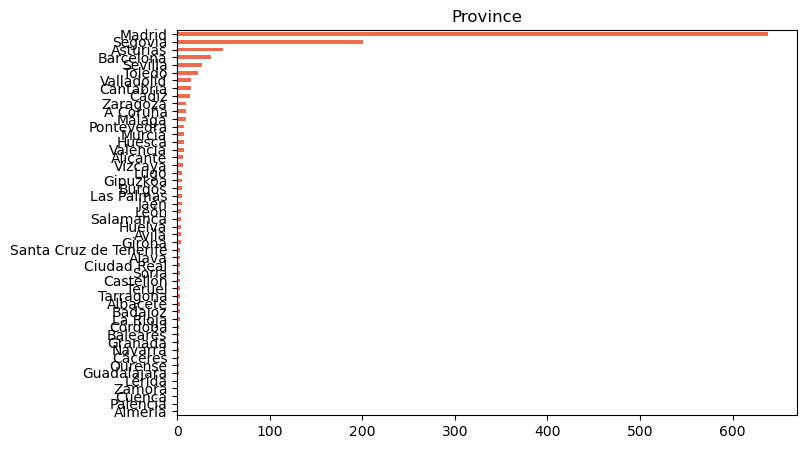

Ayudar al ecosistema         443
Ahorrar agua                 326
Ahorrar dinero               269
Conocer mi huella hídrica    142
NaN                            3
Name: Interests, dtype: int64


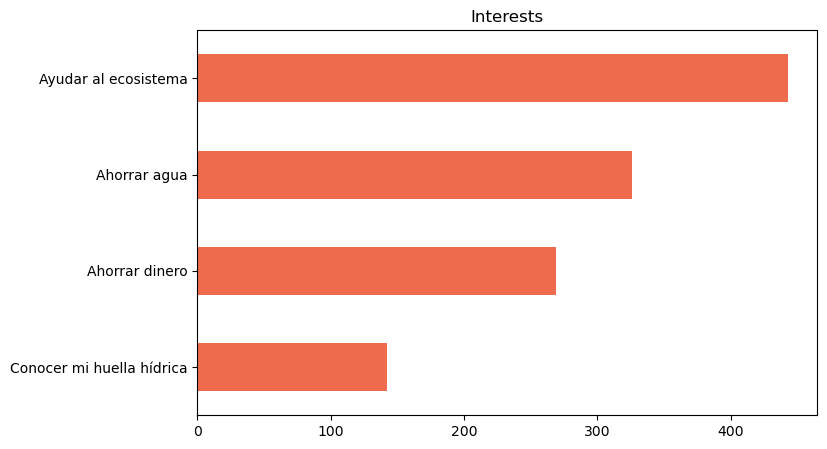

Entre 5 y 10 minutos     595
Menos de 5 minutos       411
Entre 11 y 15 minutos    136
Más de 15 minutos         38
NaN                        3
Name: Shower, dtype: int64


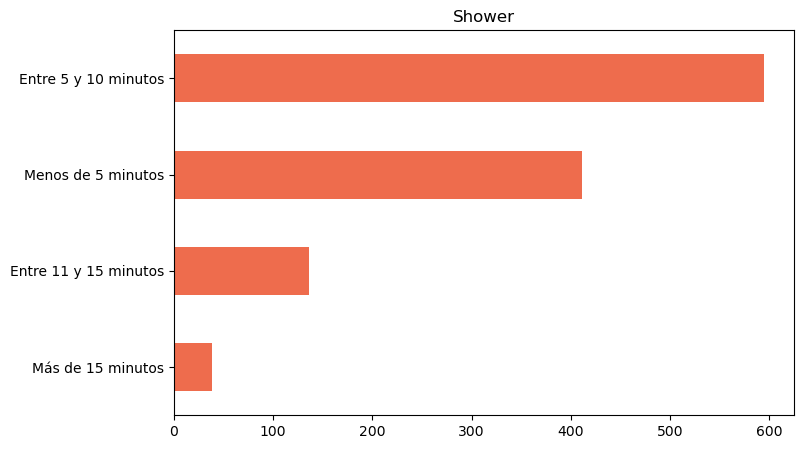

Menos de 3 veces     638
Entre 3 y 5 veces    421
Más de 5             121
NaN                    3
Name: WashingMachine, dtype: int64


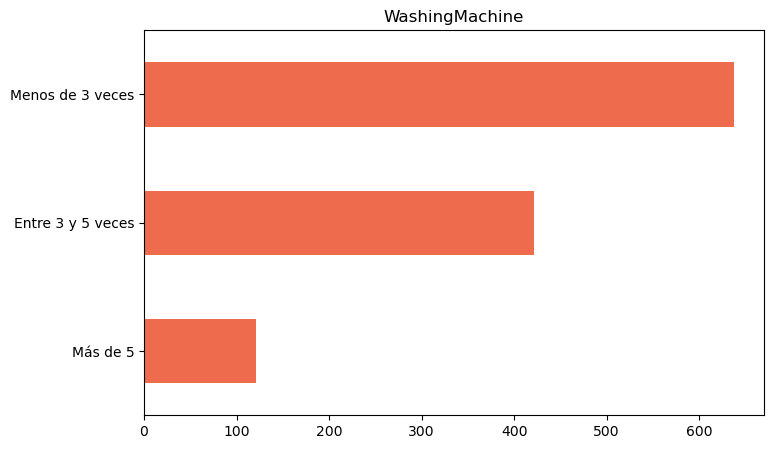

Entre 3 y 5 a la semana    603
Friego a mano              348
1 vez al día               229
NaN                          3
Name: DishWasher, dtype: int64


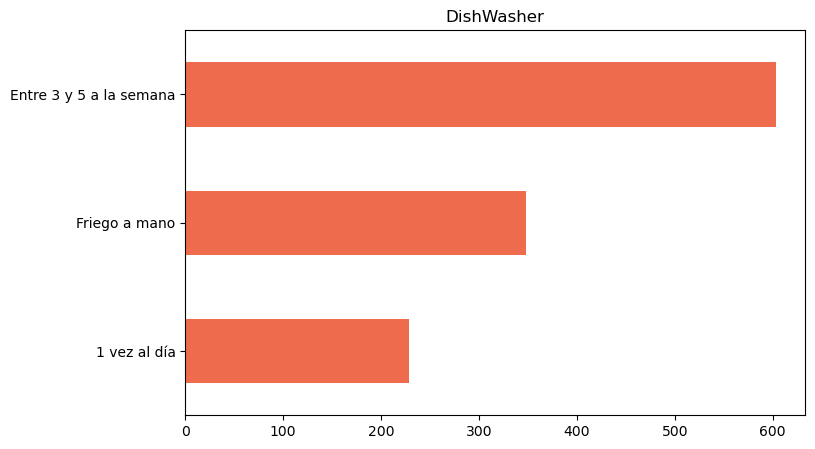

Siempre                          549
A veces                          475
No sabía que existía ese modo    156
NaN                                3
Name: EcoMode, dtype: int64


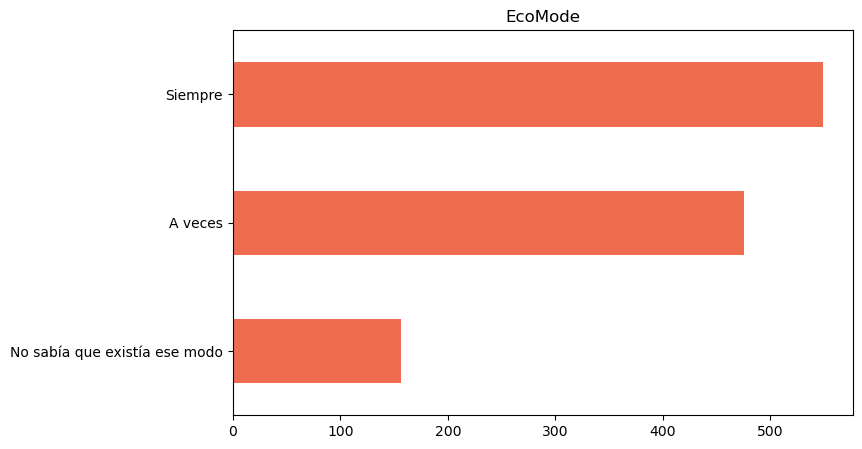

No                             605
Si                             350
Buena idea! Voy a probarlo!    225
NaN                              3
Name: WaterRecycling, dtype: int64


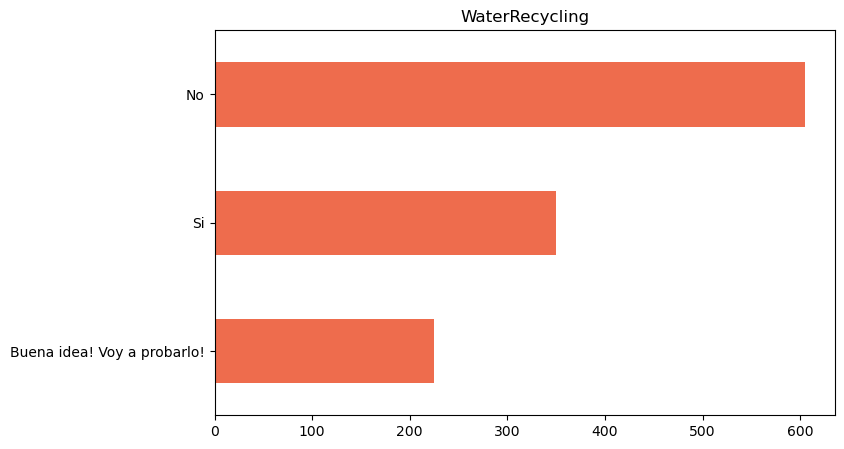

Siempre    829
A veces    294
Nunca!      57
NaN          3
Name: GeneralRecycling, dtype: int64


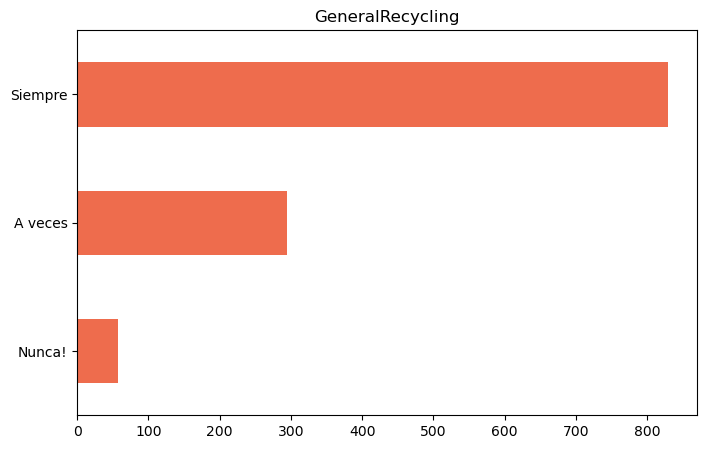

1 vez cada 3 días    575
1 vez al día         376
1 vez a la semana    190
Nunca!                39
NaN                    3
Name: Meat, dtype: int64


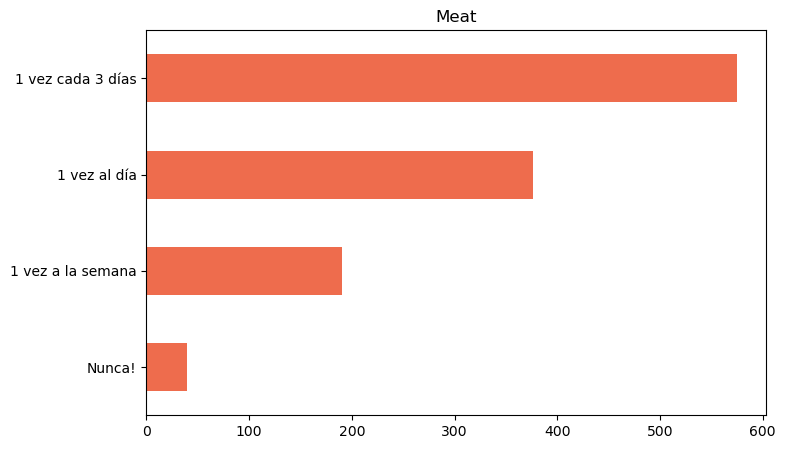

Menos de 100 km    538
No uso coche       289
100 - 200 km       212
Más de 200 km      141
NaN                  3
Name: Gasoline, dtype: int64


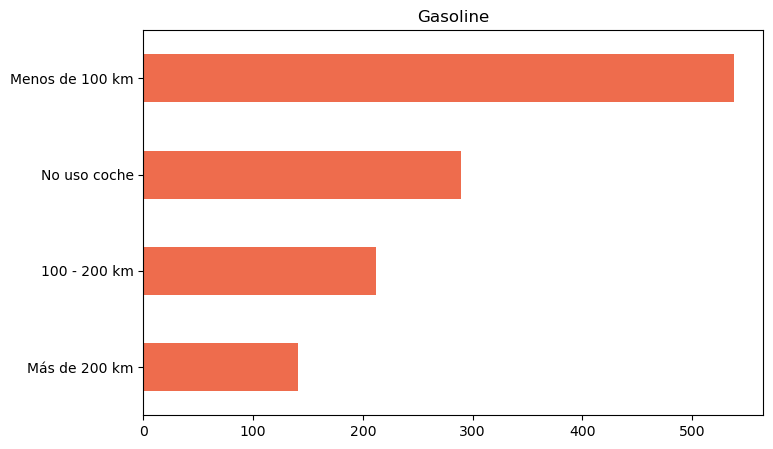

No tengo mascota    756
Menos de 50 €       265
Entre 50 y 100 €    143
Más de 100 €         16
NaN                   3
Name: Pet, dtype: int64


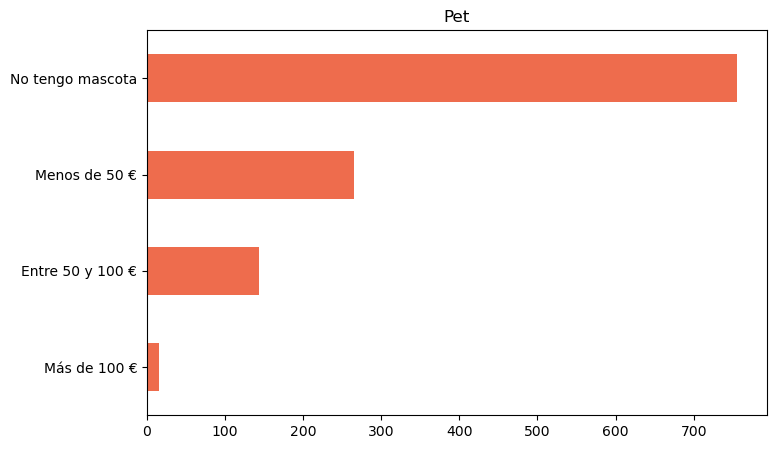

0              805
NaN             66
50              20
10              18
100             17
              ... 
75               1
2.0              1
6                1
300m             1
Ojalá tener      1
Name: Garden, Length: 96, dtype: int64


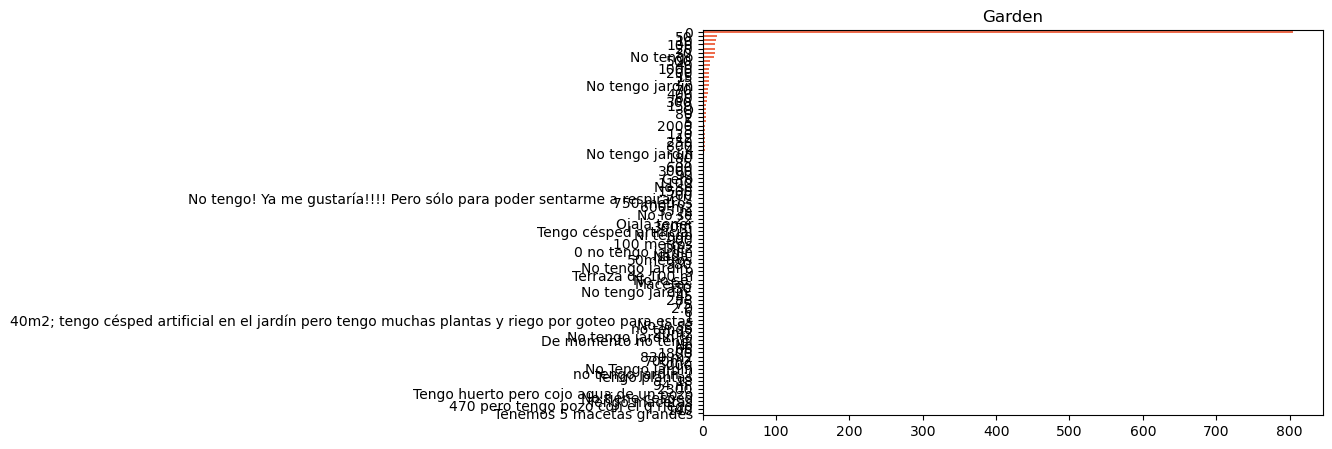

Entre 10€ y 40 €    594
Ni idea!            333
Más de 40 €         163
Menos de 10 €        88
NaN                   5
Name: Estimation, dtype: int64


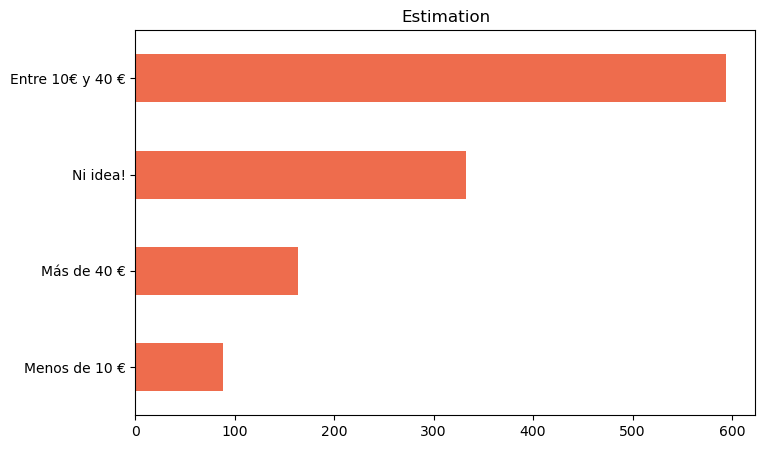

In [74]:
def plot_graph (column):
    print(df[column].value_counts(dropna= False))
    plt.figure(figsize=(8, 5))
    df[column].value_counts().sort_values(ascending=True).plot(kind='barh', ylabel= None, title= str(column))
    plt.show()


for i in list:
    plot_graph(i)


#### Check and Handle NaN



In [75]:
# All columns are type object, except residents float64

# Check for any NaN in df
print("Original length of df: ",len(df))
df.isna().sum()

Original length of df:  1183


Age                  5
Residents            5
Province             3
Interests            3
Shower               3
WashingMachine       3
DishWasher           3
EcoMode              3
WaterRecycling       3
GeneralRecycling     3
Meat                 3
Gasoline             3
Pet                  3
Garden              66
Estimation           5
dtype: int64

In [76]:
df.head()

,Age,Residents,Province,Interests,Shower,WashingMachine,DishWasher,EcoMode,WaterRecycling,GeneralRecycling,Meat,Gasoline,Pet,Garden,Estimation
0,Entre 36 y 65 años,4.0,Madrid,Ayudar al ecosistema,Entre 5 y 10 minutos,Entre 3 y 5 veces,Entre 3 y 5 a la semana,A veces,No,Siempre,1 vez al día,Más de 200 km,No tengo mascota,0,Ni idea!
1,Entre 36 y 65 años,3.0,Segovia,Ayudar al ecosistema,Menos de 5 minutos,Menos de 3 veces,Entre 3 y 5 a la semana,Siempre,No,A veces,1 vez cada 3 días,Menos de 100 km,No tengo mascota,300,Ni idea!
2,Entre 36 y 65 años,2.0,Segovia,Ahorrar dinero,Menos de 5 minutos,Menos de 3 veces,Friego a mano,No sabía que existía ese modo,No,A veces,1 vez a la semana,100 - 200 km,No tengo mascota,0,Ni idea!
3,Entre 18 y 35 años,2.0,Segovia,Ahorrar agua,Entre 5 y 10 minutos,Menos de 3 veces,Friego a mano,Siempre,No,A veces,1 vez al día,Menos de 100 km,No tengo mascota,0,Ni idea!
4,Entre 36 y 65 años,2.0,Madrid,Ahorrar agua,Entre 5 y 10 minutos,Menos de 3 veces,Friego a mano,A veces,Si,Siempre,1 vez cada 3 días,No uso coche,No tengo mascota,2,Entre 10€ y 40 €


### Feature Engineering

In [77]:
# Pet: we are interested in knowing if they have or not.
df.loc[df["Pet"] == 'No tengo mascota', "Pet"] = "No"
df.loc[df["Pet"] != 'No', "Pet"] = "Yes"

### Car: we are interested in knowing if they use the car or not.
df.loc[df["Gasoline"] == 'No uso coche', "Gasoline"] = "No"
df.loc[df["Gasoline"] != 'No', "Gasoline"] = "Yes"

# Meat: we are interested in knowing if they are meat eaters or not.
df.loc[df["Meat"] == 'Nunca!', "Meat"] = "No"
df.loc[df["Meat"] == '1 vez a la semana', "Meat"] = "No"
df.loc[df["Meat"] != 'No', "Meat"] = "Yes"

# Estimation: we are interested in knowing if they are aware with their water expenditure or not.
df.loc[df["Estimation"] == 'Ni idea!', "Estimation"] = "No"
df.loc[df["Estimation"] != 'No', "Estimation"] = "Yes"

# WaterRecylcing: Include will try and yes => yes.
df.loc[df["WaterRecycling"] != 'No', "WaterRecycling"] = "Yes"


# Age: Yound and Old.
df.loc[df["Age"] == 'Entre 36 y 65 años', "Age"] = "Old"
df.loc[df["Age"] == 'Mayor de 65 años', "Age"] = "Old"
df.loc[df["Age"] != 'Old', "Age"] = "Young"



# Shower: 3 ranges.
df.loc[df["Shower"] == 'Menos de 5 minutos', "Shower"] = "Saver"
df.loc[df["Shower"] == 'Entre 5 y 10 minutos', "Shower"] = "Medium"
df.loc[df["Shower"] == 'Entre 11 y 15 minutos', "Shower"] = "Large"
df.loc[df["Shower"] == 'Más de 15 minutos', "Shower"] = "Large"



# Eliminar

df.drop(columns=["Residents","Province"], inplace=True)
 
# Provincias
# Residents



Siempre    829
A veces    294
Nunca!      57
NaN          3
Name: GeneralRecycling, dtype: int64


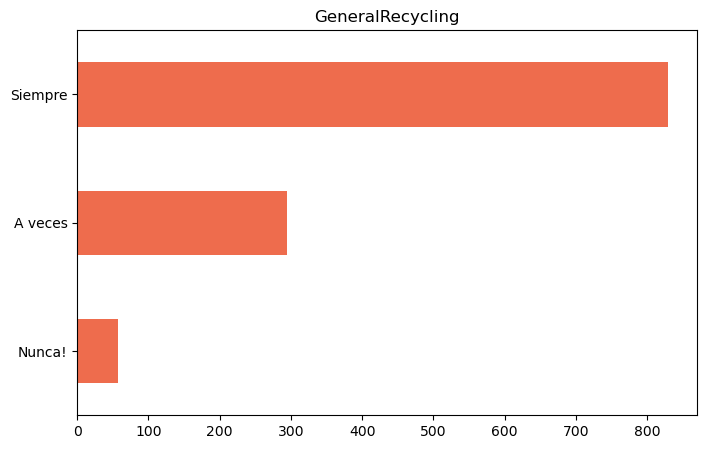

In [78]:
plot_graph("GeneralRecycling")

### Lets look into Garden column 🌷

In [79]:
#Primero necesitamos convertir la columna a str
df['Garden'] = df['Garden'].astype(str)

#Nos ayudamos de expresiones regulares
import re
def transformar_registro(registro):
    if registro.isdigit():
        return int(registro)
    else:
        numero_encontrado = re.search(r'\d+', registro)
        if numero_encontrado:
            return int(numero_encontrado.group())
        else:
            return 0
            
#hacemos la transformación correspondiente
df['Garden'] = df['Garden'].apply(transformar_registro)


In [80]:
df.head()

,Age,Interests,Shower,WashingMachine,DishWasher,EcoMode,WaterRecycling,GeneralRecycling,Meat,Gasoline,Pet,Garden,Estimation
0,Old,Ayudar al ecosistema,Medium,Entre 3 y 5 veces,Entre 3 y 5 a la semana,A veces,No,Siempre,Yes,Yes,No,0,No
1,Old,Ayudar al ecosistema,Saver,Menos de 3 veces,Entre 3 y 5 a la semana,Siempre,No,A veces,Yes,Yes,No,300,No
2,Old,Ahorrar dinero,Saver,Menos de 3 veces,Friego a mano,No sabía que existía ese modo,No,A veces,No,Yes,No,0,No
3,Young,Ahorrar agua,Medium,Menos de 3 veces,Friego a mano,Siempre,No,A veces,Yes,Yes,No,0,No
4,Old,Ahorrar agua,Medium,Menos de 3 veces,Friego a mano,A veces,Yes,Siempre,Yes,No,No,2,Yes


In [81]:
# Shower: 3 ranges.
df.loc[df["Garden"] == 0, "Garden"] = "No"
df.loc[df["Garden"] != "No", "Garden"] = "Yes"

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1183 entries, 0 to 1182
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1183 non-null   object
 1   Interests         1180 non-null   object
 2   Shower            1180 non-null   object
 3   WashingMachine    1180 non-null   object
 4   DishWasher        1180 non-null   object
 5   EcoMode           1180 non-null   object
 6   WaterRecycling    1183 non-null   object
 7   GeneralRecycling  1180 non-null   object
 8   Meat              1183 non-null   object
 9   Gasoline          1183 non-null   object
 10  Pet               1183 non-null   object
 11  Garden            1183 non-null   object
 12  Estimation        1183 non-null   object
dtypes: object(13)
memory usage: 120.3+ KB


In [82]:
df.head()

,Age,Interests,Shower,WashingMachine,DishWasher,EcoMode,WaterRecycling,GeneralRecycling,Meat,Gasoline,Pet,Garden,Estimation
0,Old,Ayudar al ecosistema,Medium,Entre 3 y 5 veces,Entre 3 y 5 a la semana,A veces,No,Siempre,Yes,Yes,No,No,No
1,Old,Ayudar al ecosistema,Saver,Menos de 3 veces,Entre 3 y 5 a la semana,Siempre,No,A veces,Yes,Yes,No,Yes,No
2,Old,Ahorrar dinero,Saver,Menos de 3 veces,Friego a mano,No sabía que existía ese modo,No,A veces,No,Yes,No,No,No
3,Young,Ahorrar agua,Medium,Menos de 3 veces,Friego a mano,Siempre,No,A veces,Yes,Yes,No,No,No
4,Old,Ahorrar agua,Medium,Menos de 3 veces,Friego a mano,A veces,Yes,Siempre,Yes,No,No,Yes,Yes


No     928
Yes    255
Name: Garden, dtype: int64


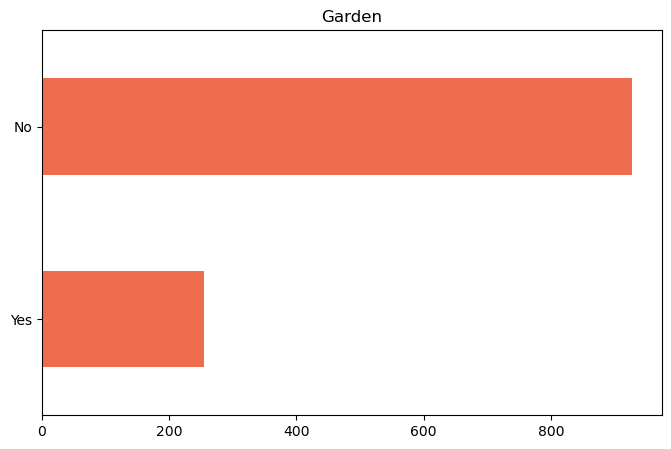

In [83]:
plot_graph("Garden")

In [84]:
# Check for any NaN in df
print("Original length of df: ",len(df))
df.isna().sum()

Original length of df:  1183


Age                 0
Interests           3
Shower              3
WashingMachine      3
DishWasher          3
EcoMode             3
WaterRecycling      0
GeneralRecycling    3
Meat                0
Gasoline            0
Pet                 0
Garden              0
Estimation          0
dtype: int64

In [85]:
# Save Garden results in Excel to view ALL of them
# values = df["Garden"]
# values.to_excel(r'./results/garden_clean.xlsx',sheet_name='train', index=False)

In [86]:
# Remove rows with NaN values
df = df.dropna()

print("Length with NaN removed: ",len(df))
# Check all are removed
df.isna().sum()

Length with NaN removed:  1180


Age                 0
Interests           0
Shower              0
WashingMachine      0
DishWasher          0
EcoMode             0
WaterRecycling      0
GeneralRecycling    0
Meat                0
Gasoline            0
Pet                 0
Garden              0
Estimation          0
dtype: int64

## Check All modified columns

Old      734
Young    446
Name: Age, dtype: int64


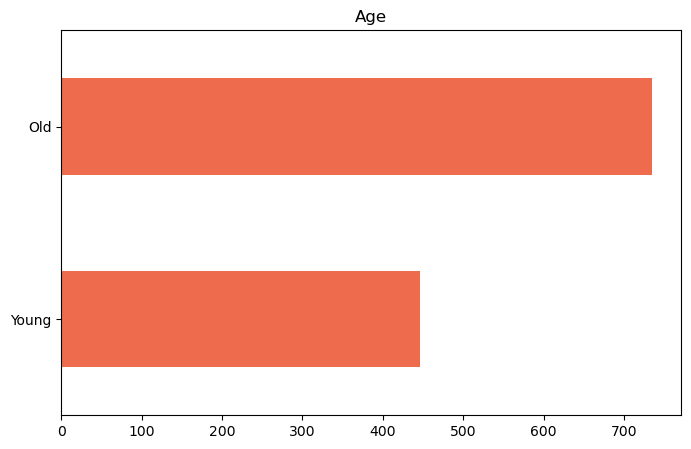

Ayudar al ecosistema         443
Ahorrar agua                 326
Ahorrar dinero               269
Conocer mi huella hídrica    142
Name: Interests, dtype: int64


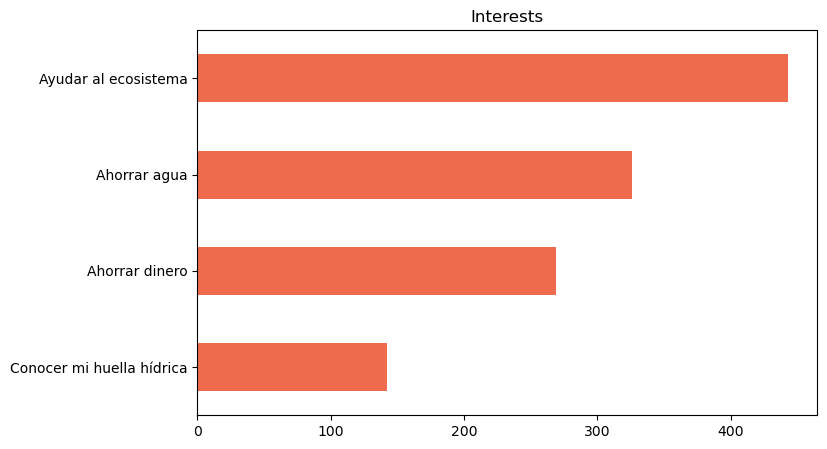

Medium    595
Saver     411
Large     174
Name: Shower, dtype: int64


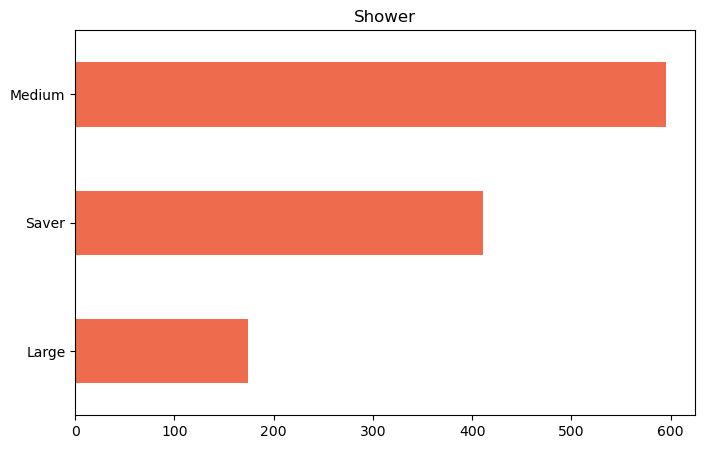

Menos de 3 veces     638
Entre 3 y 5 veces    421
Más de 5             121
Name: WashingMachine, dtype: int64


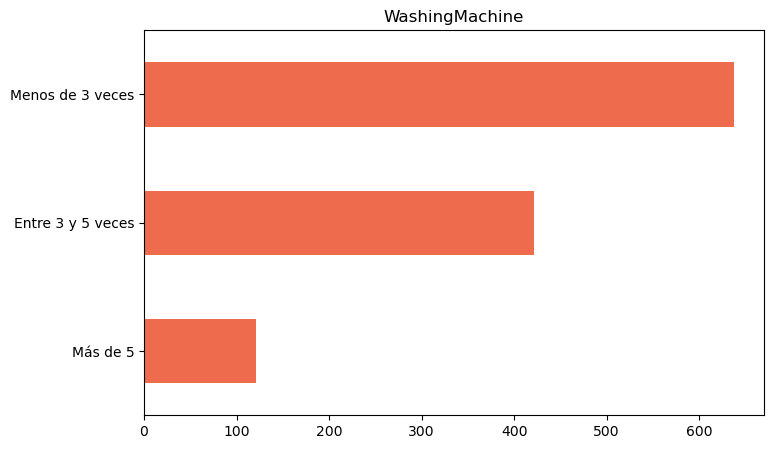

Entre 3 y 5 a la semana    603
Friego a mano              348
1 vez al día               229
Name: DishWasher, dtype: int64


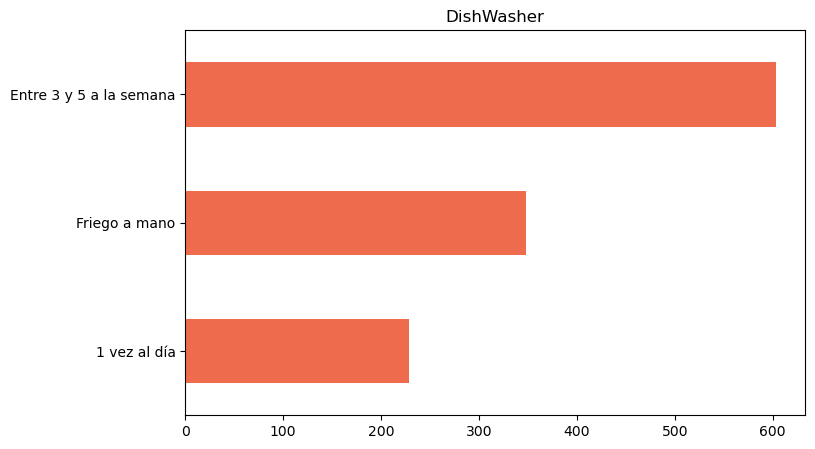

Siempre                          549
A veces                          475
No sabía que existía ese modo    156
Name: EcoMode, dtype: int64


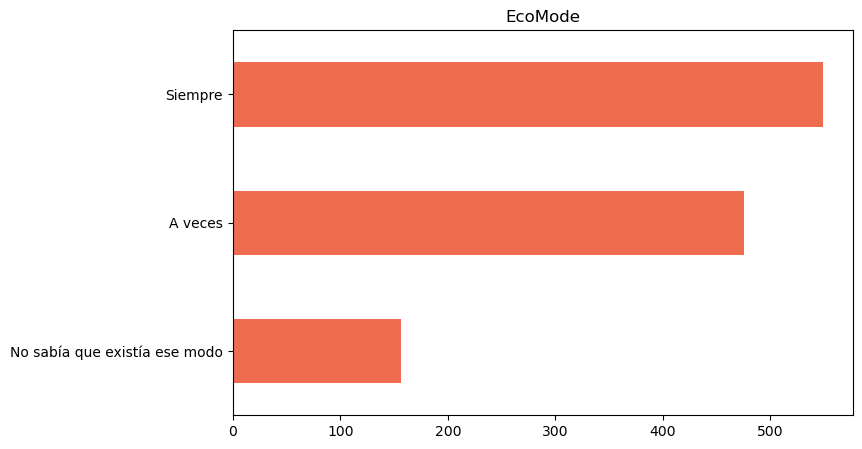

No     605
Yes    575
Name: WaterRecycling, dtype: int64


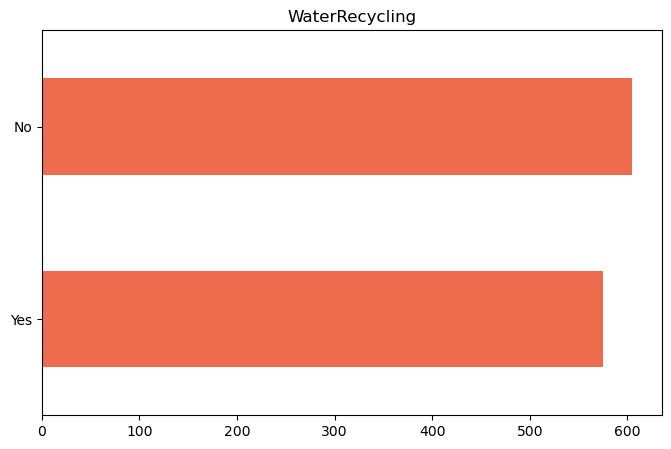

Siempre    829
A veces    294
Nunca!      57
Name: GeneralRecycling, dtype: int64


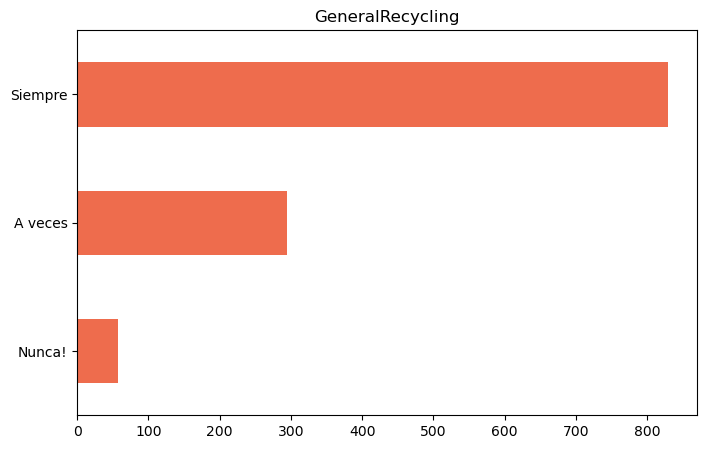

Yes    951
No     229
Name: Meat, dtype: int64


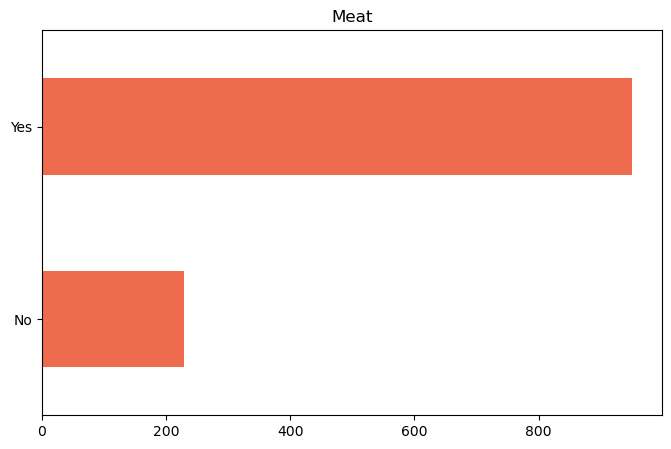

Yes    891
No     289
Name: Gasoline, dtype: int64


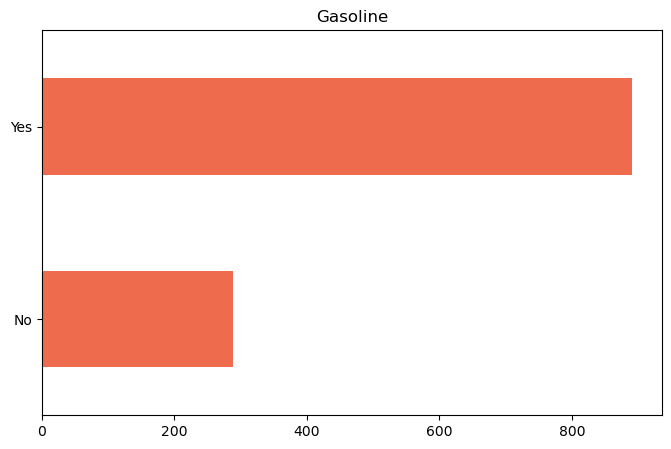

No     756
Yes    424
Name: Pet, dtype: int64


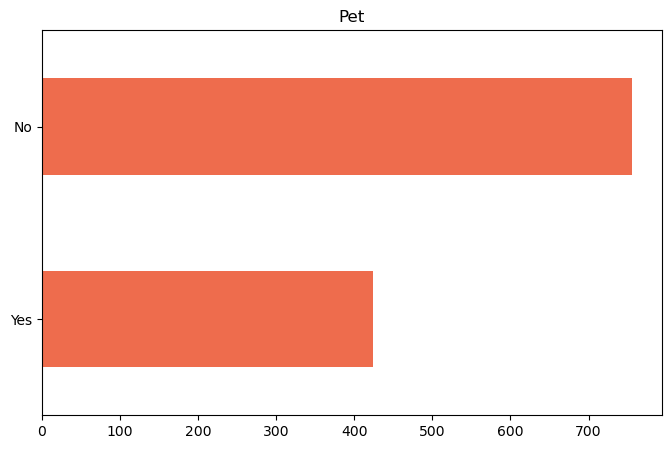

No     925
Yes    255
Name: Garden, dtype: int64


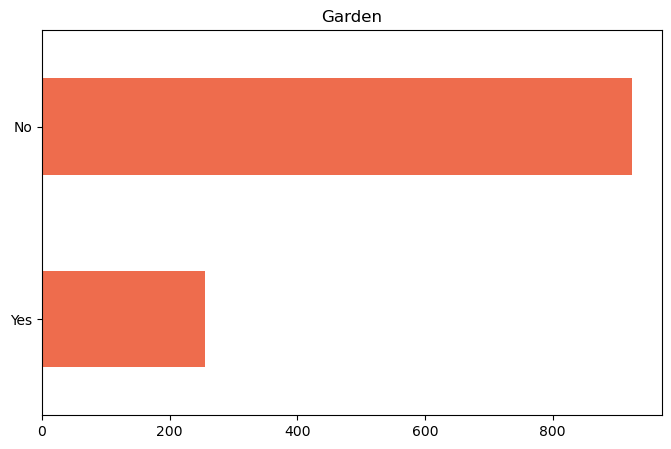

Yes    847
No     333
Name: Estimation, dtype: int64


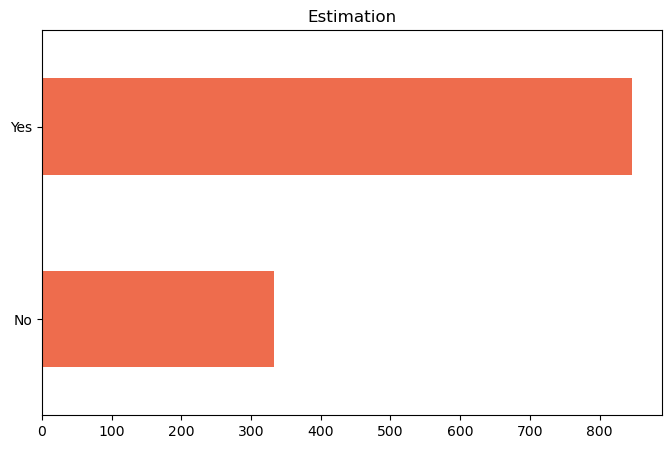

In [87]:
list_modified = [ "Age",
 "Interests",
 "Shower",
 "WashingMachine",
 "DishWasher",
 "EcoMode",
 "WaterRecycling",
 "GeneralRecycling",
 "Meat",
 "Gasoline",
 "Pet",
"Garden",
 "Estimation"]



def plot_graph (column):
    print(df[column].value_counts(dropna= False))
    plt.figure(figsize=(8, 5))
    df[column].value_counts().sort_values(ascending=True).plot(kind='barh', ylabel= None, title= str(column))
    plt.show()


for i in list_modified:
    plot_graph(i)

---


# Machine Learning

In [88]:
df.head()

,Age,Interests,Shower,WashingMachine,DishWasher,EcoMode,WaterRecycling,GeneralRecycling,Meat,Gasoline,Pet,Garden,Estimation
0,Old,Ayudar al ecosistema,Medium,Entre 3 y 5 veces,Entre 3 y 5 a la semana,A veces,No,Siempre,Yes,Yes,No,No,No
1,Old,Ayudar al ecosistema,Saver,Menos de 3 veces,Entre 3 y 5 a la semana,Siempre,No,A veces,Yes,Yes,No,Yes,No
2,Old,Ahorrar dinero,Saver,Menos de 3 veces,Friego a mano,No sabía que existía ese modo,No,A veces,No,Yes,No,No,No
3,Young,Ahorrar agua,Medium,Menos de 3 veces,Friego a mano,Siempre,No,A veces,Yes,Yes,No,No,No
4,Old,Ahorrar agua,Medium,Menos de 3 veces,Friego a mano,A veces,Yes,Siempre,Yes,No,No,Yes,Yes


In [89]:
# MÁS ECO => 0
# MENOS ECO => 1
# MENOS MENOS ECO => 2

# Gasoline
df.loc[df["Gasoline"] == "Yes", "Gasoline"] = 1
df.loc[df["Gasoline"] == "No", "Gasoline"] = 0

# Interests
df.loc[df["Estimation"] == "Ayudar al ecosistema", "Estimation"] = 0
df.loc[df["Estimation"] == "Ahorrar agua", "Estimation"] = 0
df.loc[df["Estimation"] == "Conocer mi huella hídrica", "Estimation"] = 1
df.loc[df["Estimation"] == "Ahorrar dinero", "Estimation"] = 2

# WaterRecycling
df.loc[df["WaterRecycling"] == "Yes", "WaterRecycling"] = 0
df.loc[df["WaterRecycling"] == "No", "WaterRecycling"] = 1

# Meat
df.loc[df["Meat"] == "No", "Meat"] = 0
df.loc[df["Meat"] == "Yes", "Meat"] = 1

# Shower
df.loc[df["Shower"] == "Saver", "Shower"] = 0
df.loc[df["Shower"] == "Medium", "Shower"] = 1
df.loc[df["Shower"] == "Large", "Shower"] = 2

# WashingMachine
df.loc[df["WashingMachine"] == "Menos de 3 veces", "WashingMachine"] = 0
df.loc[df["WashingMachine"] == "Entre 3 y 5 veces", "WashingMachine"] = 1
df.loc[df["WashingMachine"] == "Más de 5", "WashingMachine"] = 2

# DishWasher
df.loc[df["DishWasher"] == "1 vez al día", "DishWasher"] = 0
df.loc[df["DishWasher"] == "Entre 3 y 5 a la semana", "DishWasher"] = 1
df.loc[df["DishWasher"] == "Friego a mano", "DishWasher"] = 2

# EcoMode
df.loc[df["EcoMode"] == "Siempre", "EcoMode"] = 0
df.loc[df["EcoMode"] == "A veces", "EcoMode"] = 1
df.loc[df["EcoMode"] == "No sabía que existía ese modo", "EcoMode"] = 2

# GeneralRecycling
df.loc[df["GeneralRecycling"] == "Siempre", "GeneralRecycling"] = 0
df.loc[df["GeneralRecycling"] == "A veces", "GeneralRecycling"] = 1
df.loc[df["GeneralRecycling"] == "Nunca!", "GeneralRecycling"] = 2


### Convert categorical features into integers

In [90]:
le = LabelEncoder()

for column in df.columns:
    if df[column].dtype == 'object':
        
        df[column] = le.fit_transform(df[column])

df

,Age,Interests,Shower,WashingMachine,DishWasher,EcoMode,WaterRecycling,GeneralRecycling,Meat,Gasoline,Pet,Garden,Estimation
0,0,2,1,0,1,0,0,2,1,0,0,0,0
1,0,2,2,1,1,2,0,0,1,0,0,1,0
2,0,1,2,1,2,1,0,0,0,0,0,0,0
3,1,0,1,1,2,2,0,0,1,0,0,0,0
4,0,0,1,1,2,0,1,2,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178,1,3,0,1,1,0,1,0,1,0,1,0,1
1179,1,1,1,0,2,0,0,2,1,0,0,0,1
1180,0,1,0,0,2,0,0,0,1,1,0,0,1
1181,1,1,1,1,0,0,0,2,1,0,1,0,1


### Feature scaling

In [91]:
# Convert float64 column => int64
for column in df.select_dtypes(include=['float64']):
    df[column] = df[column].astype('int64')

In [92]:
from sklearn.preprocessing import MinMaxScaler

cols = df.columns

ms = MinMaxScaler()

X = ms.fit_transform(df)
X = pd.DataFrame(X, columns=[cols])

X.head()

,Age,Interests,Shower,WashingMachine,DishWasher,EcoMode,WaterRecycling,GeneralRecycling,Meat,Gasoline,Pet,Garden,Estimation
0,0.0,0.666667,0.5,0.0,0.5,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.666667,1.0,0.5,0.5,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.333333,1.0,0.5,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.000000,0.5,0.5,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.5,0.5,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0


## K-Means model with two clusters

In [93]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42) 

kmeans.fit(X)

/Users/ignaciogarciabarrero/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [94]:
# Here we can see the N number of centroids of each cluster
kmeans.cluster_centers_

array([[ 1.00000000e+00,  4.67717718e-01,  4.70720721e-01,
         3.63738739e-01,  5.94594595e-01,  4.62837838e-01,
         4.57207207e-01,  6.50900901e-01,  8.53603604e-01,
         3.26576577e-01,  4.23423423e-01,  1.55405405e-01,
         6.28378378e-01],
       [-2.77555756e-16,  3.99267399e-01,  6.85439560e-01,
         3.92857143e-01,  4.82142857e-01,  5.41208791e-01,
         0.00000000e+00,  7.07417582e-01,  7.96703297e-01,
         1.81318681e-01,  2.99450549e-01,  2.47252747e-01,
         7.39010989e-01],
       [ 5.37634409e-03,  4.67741935e-01,  6.72043011e-01,
         3.64247312e-01,  5.64516129e-01,  6.03494624e-01,
         1.00000000e+00,  8.36021505e-01,  7.58064516e-01,
         2.09677419e-01,  3.41397849e-01,  2.58064516e-01,
         8.03763441e-01]])

In [95]:
# The lesser the model inertia, the better the model fit.
kmeans.inertia_

# We can see that the model has very high inertia. So, this is not a good model fit to the data.

2179.550486435567

In [96]:
# column_name_types = df.columns.to_series().dtypes

# print(column_name_types)

df

,Age,Interests,Shower,WashingMachine,DishWasher,EcoMode,WaterRecycling,GeneralRecycling,Meat,Gasoline,Pet,Garden,Estimation
0,0,2,1,0,1,0,0,2,1,0,0,0,0
1,0,2,2,1,1,2,0,0,1,0,0,1,0
2,0,1,2,1,2,1,0,0,0,0,0,0,0
3,1,0,1,1,2,2,0,0,1,0,0,0,0
4,0,0,1,1,2,0,1,2,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178,1,3,0,1,1,0,1,0,1,0,1,0,1
1179,1,1,1,0,2,0,0,2,1,0,0,0,1
1180,0,1,0,0,2,0,0,0,1,1,0,0,1
1181,1,1,1,1,0,0,0,2,1,0,1,0,1


In [97]:
from sklearn.cluster import KMeans
cs = []


X = df.iloc[:, [2, 3]].values


X
# for i in range(1, 11):
#     kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
#     kmeans.fit(X)
#     cs.append(kmeans.inertia_)
# plt.plot(range(1, 11), cs)
# plt.title('The Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('CS')
# plt.show()

array([[1, 0],
       [2, 1],
       [2, 1],
       ...,
       [0, 0],
       [1, 1],
       [1, 0]])